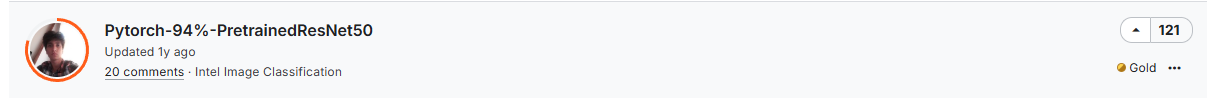

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import torchvision
from torchvision import datasets
import os
from pathlib import Path
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms , datasets
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from tqdm.auto import tqdm 
from timeit import default_timer as timer
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')

c:\Users\Leaper\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
print(f'The version of torch is : {torch.__version__}\nThe version of torchvision is : {torchvision.__version__}')

The version of torch is : 2.5.1+cu118
The version of torchvision is : 0.20.1+cu118


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
def check_diractory(directory_path):
                                 
    for dirpath , dirname , filename in os.walk(directory_path):
        print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")

In [5]:
train_dir = r"D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train"
test_dir = r"D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test"
pred_dir = r"D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_pred\seg_pred"

In [6]:
train_path = Path(train_dir)
check_diractory(train_path)

There are 6 directories and 0 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train'.
There are 0 directories and 2191 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\buildings'.
There are 0 directories and 2271 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\forest'.
There are 0 directories and 2404 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\glacier'.
There are 0 directories and 2512 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\mountain'.
There are 0 directories and 2274 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\sea'.
There are 0 directories and 2382 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\street'.


In [7]:
test_path = Path(test_dir)
check_diractory(test_path)

There are 6 directories and 0 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test'.
There are 0 directories and 437 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\buildings'.
There are 0 directories and 474 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\forest'.
There are 0 directories and 553 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\glacier'.
There are 0 directories and 525 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\mountain'.
There are 0 directories and 510 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\sea'.
There are 0 directories and 501 images in 'D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test\street'.


The path   of the random image  is : D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train\sea\19122.jpg
The class  of the random image  is : sea
The height of the random image  is : 150
The width  of the random image  is : 150


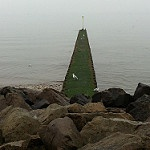

In [8]:
random.seed(42)

list_image_path = list(Path(train_dir).glob('*/*.jpg'))

Random_Image_Path = random.choice(list_image_path)

img = Image.open(Random_Image_Path)

print(f'The path   of the random image  is : {Random_Image_Path}')
print(f'The class  of the random image  is : {Random_Image_Path.parent.stem}')
print(f'The height of the random image  is : {img.height}')
print(f'The width  of the random image  is : {img.width}')
img

In [9]:
#数据增强
train_transforms = transforms.Compose([
    transforms.Resize(size=(150 , 150)) ,
    transforms.ColorJitter(0.4,0.5,0.5,0.2),
    transforms.RandomHorizontalFlip(p=0.5) , 
    transforms.RandomCrop(size=(150,150)),  
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
])


test_transforms = transforms.Compose([
    transforms.Resize((150, 150)), 
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
])

In [10]:
train_data = datasets.ImageFolder(root=train_dir , transform = train_transforms )
test_data = datasets.ImageFolder(root=test_dir , transform=test_transforms )
print(f'Train data : {train_data}\n\n\nTest data : {test_data}')
            

Train data : Dataset ImageFolder
    Number of datapoints: 14034
    Root location: D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_train\seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               ColorJitter(brightness=(0.6, 1.4), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=(-0.2, 0.2))
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(150, 150), padding=None)
               ToTensor()
               Normalize(mean=(0.425, 0.415, 0.405), std=(0.205, 0.205, 0.205))
           )


Test data : Dataset ImageFolder
    Number of datapoints: 3000
    Root location: D:\code_study\ML_CODE\dataSets\IntelImageClassification\seg_test\seg_test
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
               Normalize(mean=(0.425, 0.415, 0.405), s

In [11]:
def class_finder(directory):
    classes = sorted(i.name for i in os.scandir(directory) if i.is_dir())
    if not classes:
        raise FileNotFoundError(f'This directory dose not have any classes : {directory}')
    class_to_inx = {name : value for name , value in enumerate(classes) }
    
    return  classes , class_to_inx

In [12]:
class ImageFolderCustom(Dataset):
    
    
    def __init__(self , target_dir , transform ):
        
        self.paths = list(Path(target_dir).glob('*/*.jpg'))
        
        self.transform = transform
        
        self.classes , self.classes_to_inx = class_finder(target_dir)
    
    def load_image(self, index):
        
        image_path = self.paths[index]
        
        return Image.open(image_path)
    
    
    def __len__(self):
        
        return len(self.paths)
    
    
    
    def __getitem__(self , indx):
        
        img = self.load_image(indx)
        
        class_name = self.paths[indx].parent.name
        
        class_inx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_inx 
        else:
            return img, class_inx 
        

In [13]:
train_data_custom = ImageFolderCustom(target_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir= test_dir, 
                                     transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x2a42278bfd0>,
 <__main__.ImageFolderCustom at 0x2a409a4d490>)

In [14]:
print(f'The len of train data is : {len(train_data_custom)}\nThe len of test  data is : {len(test_data_custom)}')

The len of train data is : 14034
The len of test  data is : 3000


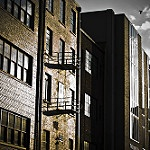

In [15]:
train_data_custom.load_image(100)

In [16]:
print(f'The number of classes are : {len(train_data_custom.classes)}')
train_data_custom.classes

The number of classes are : 6


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [17]:
train_data_custom.classes_to_inx

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [18]:
size_valid = 0.10

number_train = len(train_data_custom)
indx = list(range(number_train))

np.random.shuffle(indx)
split = int(size_valid * number_train)

train_idx, valid_idx = indx[split:], indx[:split]

train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [19]:
train_dataloader = DataLoader(dataset= train_data , 
                              batch_size= 32 ,  
                              num_workers=0,
                              sampler=train_sampler  
                              )
                             
valid_dataloader = DataLoader(dataset=train_data , 
                             batch_size=32 , 
                             num_workers=0,
                             sampler=valid_sampler                            
                             )

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=0,
                            shuffle=False)

In [20]:
img , label = next(iter(train_dataloader))
# img
print(f'The shape is : {img.shape} [batch-size , color-channels , height , width]')
print(f'The label shape is : {label.shape}')

The shape is : torch.Size([32, 3, 150, 150]) [batch-size , color-channels , height , width]
The label shape is : torch.Size([32])


In [21]:
Model = torchvision.models.wide_resnet50_2(pretrained=True)

for param in Model.parameters():
    param.required_grad = False
    
number_feature = Model.fc.in_features
Model.fc = nn.Linear(in_features=number_feature , out_features=len(train_data.classes))

In [22]:
Model.fc
Model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

In [23]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model.parameters() , lr = 0.01)
schedul_learning = torch.optim.lr_scheduler.MultiStepLR(optimizer=optimizer , milestones=[3 , 6 ] ,
                                                        gamma=0.055)

In [24]:
try :
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary   
summary(Model, input_size=[1, 3, 64, 64] )

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 6]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 256, 16, 16]          --
│    └─Bottleneck: 2-1                   [1, 256, 16, 16]          --
│    │    └─Conv2d: 3-1                  [1, 128, 16, 16]          8,192
│    │    └─BatchNorm2d: 3-2             [1, 128, 16, 16]          256
│    │    └─ReLU: 3-3                    [1, 128, 16, 16]          --
│    │    └─Conv2d: 3-4                  [1, 128, 16, 16]          147,456
│    │    └─BatchNorm2d: 3-5             [1, 128, 16, 16]          256
│    │    └─ReLU: 3-6                    [1, 128, 16, 16]          --
│

In [25]:
st_time = timer()
epochs = 8


valid_loss_min = np.Inf
Valid_loss = []
Train_loss = []

for epoch in tqdm(range(1,epochs+1)):

    
    train_loss  = 0.0 
    valid_loss  = 0.0 

    #train
    Model.train()
    
    for batch , (X, y) in enumerate(train_dataloader):       
       
        
        X, y = X.to(device), y.to(device)
       
        optimizer.zero_grad()
       
        y_pred = Model(X)
       
        loss = loss_function(y_pred , y)
        
        
        loss.backward()
        
        optimizer.step()
        
        
        train_loss += loss.item()*X.size(0)
    

 
    #validation
    Model.eval()
    
    for batch , (X, y) in enumerate(valid_dataloader):
            
        X , y = X.to(device), y.to(device)
       
        y_pred = Model(X)
       
        loss = loss_function(y_pred, y)
       
        valid_loss += loss.item()*X.size(0)
  
        
       
    train_loss = train_loss/len(train_dataloader.sampler)
    valid_loss = valid_loss/len(valid_dataloader.sampler)
    Valid_loss.append(valid_loss)
    Train_loss.append(train_loss)
   
    schedul_learning.step()
    schedul_learning
    end_time = timer()
   
    print('Epoch: {} \nTraining Loss: {:.3f} \nValidation Loss: {:.3f}'.format(epoch, train_loss, valid_loss))
    
  
    if valid_loss <= valid_loss_min:
        
        print("Decrease Validation Loss {:.4f} : {:.4f} ".format(valid_loss_min, valid_loss))
        torch.save(Model.state_dict(), 'My_Model.pt')
        valid_loss_min = valid_loss
        
    print('Learning Rate : {:.4f}'.format(optimizer.state_dict()['param_groups'][0]['lr']))
    print('\nTime : {:.2f}'.format(end_time - st_time))
    print('----------------------------------')

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch: 1 
Training Loss: 0.436 
Validation Loss: 0.220
Decrease Validation Loss inf : 0.2203 


 12%|█▎        | 1/8 [02:59<20:59, 179.99s/it]

Learning Rate : 0.0100

Time : 179.16
----------------------------------
Epoch: 2 
Training Loss: 0.221 
Validation Loss: 0.198
Decrease Validation Loss 0.2203 : 0.1984 


 25%|██▌       | 2/8 [06:08<18:29, 184.97s/it]

Learning Rate : 0.0100

Time : 367.68
----------------------------------
Epoch: 3 
Training Loss: 0.166 
Validation Loss: 0.193
Decrease Validation Loss 0.1984 : 0.1933 


 38%|███▊      | 3/8 [09:16<15:32, 186.44s/it]

Learning Rate : 0.0006

Time : 555.86
----------------------------------
Epoch: 4 
Training Loss: 0.118 
Validation Loss: 0.179
Decrease Validation Loss 0.1933 : 0.1794 


 50%|█████     | 4/8 [12:24<12:28, 187.15s/it]

Learning Rate : 0.0006

Time : 744.01
----------------------------------


 62%|██████▎   | 5/8 [15:44<09:34, 191.59s/it]

Epoch: 5 
Training Loss: 0.103 
Validation Loss: 0.181
Learning Rate : 0.0006

Time : 944.33
----------------------------------


 75%|███████▌  | 6/8 [20:54<07:43, 231.98s/it]

Epoch: 6 
Training Loss: 0.108 
Validation Loss: 0.191
Learning Rate : 0.0000

Time : 1254.71
----------------------------------
Epoch: 7 
Training Loss: 0.103 
Validation Loss: 0.176
Decrease Validation Loss 0.1794 : 0.1758 


 88%|████████▊ | 7/8 [26:13<04:20, 260.50s/it]

Learning Rate : 0.0000

Time : 1573.16
----------------------------------


100%|██████████| 8/8 [31:32<00:00, 236.60s/it]

Epoch: 8 
Training Loss: 0.102 
Validation Loss: 0.182
Learning Rate : 0.0000

Time : 1892.84
----------------------------------


In [ ]:
sns.set_style('darkgrid')
plt.plot(Train_loss, label='Training loss')
plt.plot(Valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Number of Epoch' , size = 15 , c = 'gray')
plt.ylabel('Loss' , size = 15 , c='gray')
plt.title('Model Changes')
plt.show()

In [ ]:
Model.load_state_dict(torch.load('My_Model.pt'))
Model.eval()
Model.cuda()

In [ ]:
single_img, all_img = 0,0

for images, labels in test_dataloader:
    for i in range(len(labels)):
        images = images.cuda()
        labels = labels.cuda()
        img = images[i].view(1,3,150,150)
        
        with torch.no_grad():
            logps = Model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            single_img += 1
        all_img += 1
        
print(f'There are {all_img} in test')
print(f'The model accuracy is :{round((single_img/all_img)*100  , 2)}')

In [ ]:
def pred_class(img):
    
    img_tens = test_transforms(img)
    img_im = img_tens.unsqueeze(0).cuda() 
    uinput = Variable(img_im)
    uinput = uinput.to(device)
    out = Model(uinput)
    index = out.data.cpu().numpy().argmax()    
    return index

In [ ]:
classes = {classes:values for classes , values in enumerate(sorted(train_data_custom.classes))}
Model.eval()

prediction_images = [os.path.join(d_pred, i)for i in os.listdir(d_pred)]
plt.figure(figsize=(20,30))
for i, images in enumerate(prediction_images):
    if i > 49 :break
    img = Image.open(images)
    index = pred_class(img)
    plt.subplot(10,5,i+1)
    plt.title(classes[index])
    plt.axis('off')
    plt.imshow(img)